In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
N=32
lattice=np.random.choice([-1,1],[N,N])

# Funciones

In [4]:
def draw(matriz):
    plt.imshow(matriz, cmap='hot')
    plt.show()

In [5]:
def sum_roll(matriz):

    sum = matriz * np.roll(matriz,1,axis=0)
    sum = sum + matriz * np.roll(matriz,-1,axis=0)
    sum = sum + matriz * np.roll(matriz,1,axis=1)
    sum = sum + matriz * np.roll(matriz,-1,axis=1)

    return sum

In [6]:
def suma_vecinos(matrix,i,j):
    N=len(matrix)-1
    if i!=0 and i!=N and j!=0 and j!=N:
        suma=matrix[i+1,j]+matrix[i-1,j]+matrix[i,j-1]+matrix[i,j+1]

    #Esquinas
    elif i==0 and j==0:
        suma=matrix[0,1]+matrix[1,0]+matrix[-1,0]+matrix[0,-1]
    elif i==0 and j==N:
        suma=matrix[1,-1]+matrix[0,-2]+matrix[0,0]+matrix[-1,-1]
    elif i==N and j==0:
        suma=matrix[-2,0]+matrix[-1,1]+matrix[-1,-1]+matrix[0,0]
    elif i==N and j==N:
        suma=matrix[-1,-2]+matrix[-2,-1]+matrix[-1,0]+matrix[0,-1]

      #Extremos
    elif (i==0 and j!=0) and (i==0 and j!=N):
        suma=matrix[i,j-1]+matrix[i,j+1]+matrix[1,j]+matrix[-1,j]
    elif (i==N and j!=0) and (i==N and j!=N):
        suma=matrix[i,j-1]+matrix[i,j+1]+matrix[0,j]+matrix[-2,j]
    elif (j==0 and i!=0) and (j==0 and i!=N):
        suma=matrix[i+1,j]+matrix[i-1,j]+matrix[i,j+1]+matrix[i,-1]
    elif (j==N and i!=0) and (j==N and i!=N):
        suma=matrix[i+1,j]+matrix[i-1,j]+matrix[i,j-1]+matrix[i,0]

    return suma


In [7]:
def plot_3temps(T,M,E,dibujos):

    for dibujo in dibujos:
        draw(dibujo)

    # Crea nueva figura
    plt.figure(figsize=(12, 3))

    # Crear primer subplot
    plt.subplot(121)  # 1 fila, 2 columnas, plot 1
    i = 0

    for mag in M:
        plt.plot(mag, label = f"T = {T[i]}")
        i += 1
        plt.legend()
        plt.ylabel(r"Magnetización $(M)$")
        plt.grid()

    # Crear segundo subplot
    plt.subplot(122)  # 1 fila, 2 columnas, plot 2
    i = 0
    for en in E:
        plt.plot(en, label = f"T = {T[i]}")
        i += 1
        plt.legend()
        plt.ylabel(r"Energía $(E)$")
        plt.grid()

    # Add a title to the entire figure
    plt.suptitle("Magnetización y energía")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [8]:
def plot_means(temp,prom_mag,prom_ener):

    # Crea nueva figura
    plt.figure(figsize=(12, 3))

    # Crear primer subplot
    plt.subplot(121)  # 1 fila, 2 columnas, plot 1

    plt.plot(temp,prom_mag)
    plt.ylabel(r"Magnetización promedio")
    plt.grid()

    # Crear segundo subplot
    plt.subplot(122)  # 1 fila, 2 columnas, plot 2
    plt.plot(temp,prom_ener)
    plt.ylabel(r"Energía promedio")
    plt.grid()

    # Add a title to the entire figure
    plt.suptitle("Magnetización y energía promedio")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [9]:
def plot_vars(temp,var_mag,var_ener):
    # Crea nueva figura
    plt.figure(figsize=(12, 3))

    # Crear primer subplot
    plt.subplot(121)  # 1 fila, 2 columnas, plot 1

    plt.plot(temp,var_mag)
    plt.ylabel(r"Varianza de la magnetización ")
    plt.xlabel(r"Temperatura")
    plt.grid()

    # Crear segundo subplot
    plt.subplot(122)  # 1 fila, 2 columnas, plot 2
    plt.plot(temp,var_ener)
    plt.ylabel(r"Varianza de la energía")
    plt.xlabel(r"Temperatura")
    plt.grid()

    # Add a title to the entire figure
    plt.suptitle("Varianza de magentización y energía")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [10]:
def energy(matriz):
    suma = sum_roll(matriz)
    energia = (-1)*sum(sum(suma))/2

    return energia

In [11]:
def magnetization(matriz):
    M_spin=sum(sum(matriz))/(len(matriz)**2)

    return M_spin

In [12]:
def metropolis(lattice,steps,temperature,acum_energy):
    matrix=np.copy(lattice)
    list_states = []
    magnetization_states = np.zeros(steps)
    energy_states = np.zeros(steps)
    i_range = tqdm(range(0, steps), desc = "Progreso total")

    for i in i_range:

        for j in range(N**2):
            x = np.random.randint(0,N)
            y = np.random.randint(0,N)

            spin_i = matrix[x,y] #Spin inicial
            spin_f = -1*spin_i #Sprin invertido

            # Change in energy
            dE=2*spin_i*suma_vecinos(matrix,x,y)

            # Accept spin
            if (dE>0) and (np.random.random() < np.exp(-dE/temperature)):
                matrix[x,y]=spin_f
                acum_energy += dE


            elif dE<=0:
                matrix[x,y]=spin_f
                acum_energy += dE

        # Save magnetization and energy of each state
        magnetization_states[i] = magnetization(matrix)
        energy_states[i] = acum_energy

        # Save current state
        list_states.append(np.copy(matrix))

        i_range.close()

    # Save all states as an array with shape (steps,N,N)
    states = np.array(list_states)

    return magnetization_states, energy_states, states

In [13]:
def test_3_temps(steps,T,lattice):
    mattice=np.copy(lattice)
    M = []
    E = []
    dibujos = []
    energia=energy(mattice)

    for temp in tqdm(T, desc = "Temp"):
        magnetization_states, energy_states, states = metropolis(mattice,steps,temp,energia)
        dibujos.append(states[-1])
        M.append(magnetization_states)
        E.append(energy_states)

    return(M,E,states,dibujos)

In [14]:
def metropolis_sin_states(lattice,steps,temperature,acum_energy):
    
    matrix=np.copy(lattice)

    for i in range(steps):

        for j in range(N**2):

            x = np.random.randint(0,N)
            y = np.random.randint(0,N)

            # Change in energy
            dE=2*matrix[x,y]*suma_vecinos(matrix,x,y)

            # Accept spin
            if (dE<=0) or (np.random.random() < np.exp(-dE/temperature)):
                matrix[x,y]=-matrix[x,y]
                acum_energy += dE

    return (magnetization(matrix)), acum_energy

In [19]:
def test_temperatures(N,M,steps,temp,lattice):
    mattice=np.copy(lattice)
    energia=energy(mattice)

    mag_states=np.zeros(len(temp))
    ener_states=np.zeros(len(temp))

    mag_matrix = np.zeros([M,len(temp)])
    ener_matrix = np.zeros([M,len(temp)])


    for j in tqdm(range(M),desc="Repetición"):
        k=0
        for i in tqdm(temp, desc = "Temp"):
            mag_state, energy_state = metropolis_sin_states(mattice,steps,i,energia)
            mag_states[k]=mag_state
            ener_states[k]=energy_state
            k += 1

        mag_matrix[j]=mag_states
        ener_matrix[j]=ener_states

    return mag_matrix,ener_matrix

# Simulación con tres temperaturas

In [ ]:
steps=5000
temp = [1.8, 2.3, 3]

magnetization_states,energy_states,states,dibujos = test_3_temps(steps, temp, lattice)

Temp:   0%|          | 0/3 [00:00<?, ?it/s]

Progreso total:   0%|          | 0/5000 [00:00<?, ?it/s]

Progreso total:   0%|          | 0/5000 [00:00<?, ?it/s]

Progreso total:   0%|          | 0/5000 [00:00<?, ?it/s]

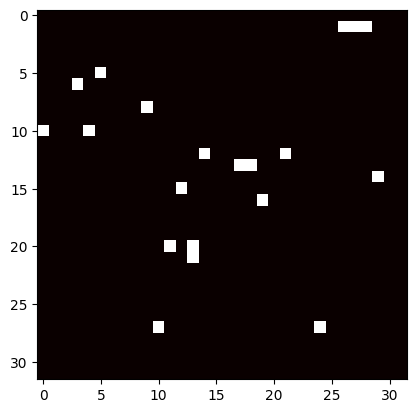

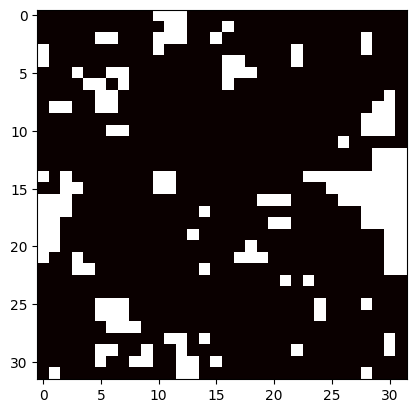

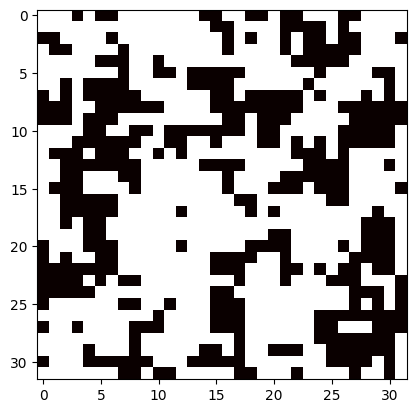

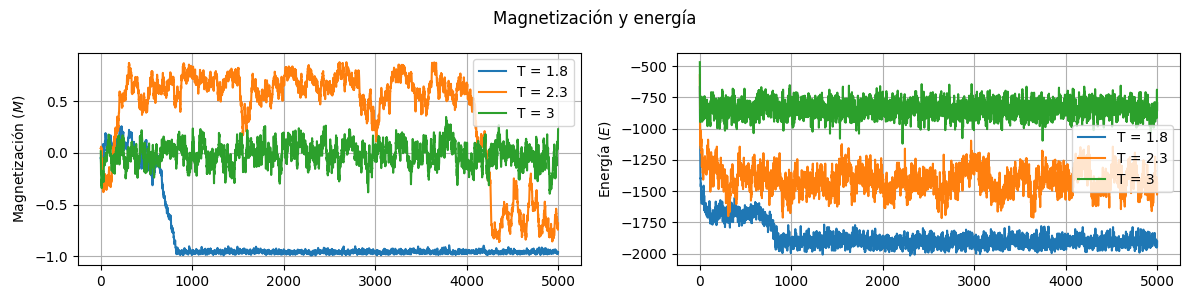

In [ ]:
plot_3temps(temp, magnetization_states, energy_states, dibujos)

# Simulación con 100 temperaturas

In [ ]:
N=32
M=10
steps=1000
temp=np.linspace(1.8,3, num=150)

mag_matrix, ener_matrix = test_temperatures(N,M,steps,temp,lattice)

In [21]:
var_mag=np.var(abs(mag_matrix),axis=0)
var_ener=np.var(ener_matrix,axis=0)

mean_mag=np.mean(abs(mag_matrix),axis=0)
mean_ener=np.mean(ener_matrix,axis=0)

In [22]:
# Save to csv
np.savetxt('temp.csv', temp, delimiter=',')
np.savetxt('mag_matrix_15.csv', mag_matrix, delimiter=',')
np.savetxt('energy_matrix_15.csv', ener_matrix, delimiter=',')

In [ ]:
plot_means(temp,mean_mag,mean_ener)
plot_vars(temp,var_mag,var_ener)